<a id="top"></a>
# Instacart Marketing Campaign Optimization on Consumer Purchasing Behavior

#### Created by:  Sucheta Das, Cherish D'Souza, Alexander Heger, Boyue Li, Riddhima Shukla, Valentina Torres


### Abstract

This report seeks to explore the trends in customer purchasing behavior on the Instacart online grocery shopping platform.  Through exploratory data analysis of when customers shop, what products they order and reorder, and from which departments they shop most frequently, we conclude that Instacart's strengths are as a grocery distributor that offers fresh, perishable products in a convenient, time-efficient manner.  Instacart's best practice is to recommend products similar to those which a user has already purchased, and to target users for new product recommendations only after they have their routine items in their virtual cart.  We look further into users' interaction with organic and non-organic products and make the recommendation that Instacart expand its organic selection based on interest in the departments where organic products are prevelant, although further analysis would need to be done to explore profitability of organic groceries as a strategy.  

<hr>

### Table of Contents

__[I. Introduction](#section-i)__

__[II. Data Wrangling and Exploration](#section-ii)__

> A. Data Wrangling
 
> B. Data Exploration
 
> C. Data Cleaning
 
__[III. Marketing Application](#section-iii)__

> A. Order Analysis

> B. Understanding Reordering Behavior

> C. Insights on Departments

__[IV. Analysis on Organic Products](#section-iv)__ 

__[V. Conclusions](#section-v)__

__[VI. References](#section-vi)__

<hr>

<a id="section-i"></a>
## I. Introduction

[Back to Top](#top)

__Problem Statement:__ As the marketing analytics team at Instacart, we aim to study customer purchasing behavior in order to optimize our strategy to users.  This includes analyzing observations on when customers shop, what they purchase, and the departments from which they buy most often so we can interact in a meaningful way which brings them back to the app.

__Motivation:__ As Instacart analytics team members, and users of Instacart ourselves, we are interested in optimizing the app’s approach to keeping users engaged, and increasing the number of orders across all departments.  We care about offering a fully online approach to healthy grocery shopping that meets a diverse set of users’ needs.

__Data Sources:__ 

- We accessed the raw data __[here](https://www.kaggle.com/competitions/instacart-market-basket-analysis/data)__.

- Instacart originally published a press release for their dataset __[here](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)__.

- A data dictionary for this dataset can be found __[here](https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b)__.

<hr>

<a id="section-ii"></a>
## II. Data Wrangling and Exploration

[Back to Top](#top)

### A. Data Wrangling

This dataset is a join of 5 different files from a 2017 Kaggle competition asking participants to predict which products users will order again using machine learning:

 - orders.csv (order details placed by any user),
 - products.csv (details of a product),
 - order_product__prior.csv (product details for any prior order), departments,
 - order_product__train.csv (current order data of every user),
 - department.csv (details of department)
 
Overall, the combined dataset tells us about three main categories: users, products, and orders.

We began by taking a look at the shape and head of 'products.csv', 'orders.csv', 'order_products__train.csv', and 'order_products__prior.csv'.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_prod = pd.read_csv('products.csv')
print(data_prod.shape);
data_prod.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
data_order = pd.read_csv('orders.csv')
print(data_order.shape);
data_order.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
data_ord_prod = pd.read_csv('order_products__train.csv')
print(data_ord_prod.shape);
data_ord_prod.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [8]:
data_ord_prior = pd.read_csv('order_products__prior.csv')
print(data_ord_prior.shape);
data_ord_prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


We noticed that 'order_products__train.csv' and 'order_products__prior.csv' have the same column names, so we concatenated these two tables vertically.

In [9]:
data_all_orders = pd.concat([data_ord_prod, data_ord_prior])
print(data_all_orders.shape);
data_all_orders.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


Then, we executed our first merge of the concatenated tables with 'products.csv'.

In [10]:
merge_1 = pd.merge(data_all_orders, data_prod, 
                   on='product_id')
print(merge_1.shape);
merge_1.head()

(33819106, 7)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16


Next, we added 'orders.csv' to the merged table.

In [11]:
merge_2 = pd.merge(merge_1, data_order, 
                   on='order_id')
print(merge_2.shape);
merge_2.head()

(33819106, 13)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,train,4,4,10,9.0
2,1,10246,3,0,Organic Celery Hearts,83,4,112108,train,4,4,10,9.0
3,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,4,10,9.0
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,112108,train,4,4,10,9.0


From this second join, we decided to drop `aisle_id` and `eval_set` since these values related to the Kaggle competition, but not to our project's problem statement.

In [12]:
merge_2 = merge_2.drop(columns=['aisle_id', 'eval_set'])
print(merge_2.shape);
merge_2.head()

(33819106, 11)


,order_id,product_id,add_to_cart_order,reordered,product_name,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,16,112108,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,16,112108,4,4,10,9.0
2,1,10246,3,0,Organic Celery Hearts,4,112108,4,4,10,9.0
3,1,49683,4,0,Cucumber Kirby,4,112108,4,4,10,9.0
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,15,112108,4,4,10,9.0


Then we took a look at the 'departments.csv' file and merged its information with the combined table.

In [13]:
data_dept = pd.read_csv('departments.csv')
print(data_dept.shape);
data_dept.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [14]:
merge_3 = pd.merge(merge_2, data_dept, 
                   on='department_id')
print(merge_3.shape);
merge_3.head()

(33819106, 12)


,order_id,product_id,add_to_cart_order,reordered,product_name,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,department
0,1,49302,1,1,Bulgarian Yogurt,16,112108,4,4,10,9.0,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,16,112108,4,4,10,9.0,dairy eggs
2,1,22035,8,1,Organic Whole String Cheese,16,112108,4,4,10,9.0,dairy eggs
3,816049,49302,7,1,Bulgarian Yogurt,16,47901,14,4,6,16.0,dairy eggs
4,816049,22035,14,0,Organic Whole String Cheese,16,47901,14,4,6,16.0,dairy eggs


This third join resulted in our combined dataset which we saved as 'imba.csv', referring to Instacart Market Basket Analysis, so we could transport it across the three virtual machines we used to conduct our analyses. 

We have commented out the last cell of this subsection to avoid overwriting our combined file.

In [15]:
#merge_3.to_csv('imba.csv', index=False)

### B. Data Exploration

In [3]:
data = pd.read_csv('imba.csv')

data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,department
0,1,49302,1,1,Bulgarian Yogurt,16,112108,4,4,10,9.0,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,16,112108,4,4,10,9.0,dairy eggs
2,1,22035,8,1,Organic Whole String Cheese,16,112108,4,4,10,9.0,dairy eggs
3,816049,49302,7,1,Bulgarian Yogurt,16,47901,14,4,6,16.0,dairy eggs
4,816049,22035,14,0,Organic Whole String Cheese,16,47901,14,4,6,16.0,dairy eggs


In [17]:
data.shape

(33819106, 12)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   department_id           int64  
 6   user_id                 int64  
 7   order_number            int64  
 8   order_dow               int64  
 9   order_hour_of_day       int64  
 10  days_since_prior_order  float64
 11  department              object 
dtypes: float64(1), int64(9), object(2)
memory usage: 3.0+ GB


In [19]:
data.isna().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
department_id                   0
user_id                         0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
department                      0
dtype: int64

In [20]:
data.describe()

,order_id,product_id,add_to_cart_order,reordered,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.174104e+07
mean,1.710566e+06,2.557551e+04,8.367738e+00,5.900617e-01,9.918544e+00,1.029444e+05,1.713998e+01,2.737285e+00,1.343123e+01,1.136415e+01
std,9.874008e+05,1.409770e+04,7.139540e+00,4.918220e-01,6.281655e+00,5.946733e+04,1.749829e+01,2.093296e+00,4.246149e+00,8.940500e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.554130e+05,1.351900e+04,3.000000e+00,0.000000e+00,4.000000e+00,5.143500e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00
50%,1.710660e+06,2.525600e+04,6.000000e+00,1.000000e+00,9.000000e+00,1.026260e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00
75%,2.565587e+06,3.793500e+04,1.100000e+01,1.000000e+00,1.600000e+01,1.544120e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00,2.100000e+01,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


As you can see from the above, the combined dataset comprises 33,819,106 records, each representing the sale of an individual product to an Instacart customer.  

The dataset has no missing values except for in orders.csv in the `days_since_prior_order` column. The missing values here indicate that a user has only ordered once from Instacart (`order_number` = 1). 

There are 12 columns in the dataset, representing the following:

 - `order_id` is the unique identifier for an Instacart order
 - `product_id` is the unique identifier for a product offered on Instacart, tied to `product_name`
 - `add_to_cart_order` is the sequential order in which a customer added a product to their online shopping cart
 - `reordered` is a binary categorical variable indicating whether or not a customer has ordered a product previously: 0 signifies that a customer has not previously ordered a product, 1 signifies the reorder of a product
 - `department_id` is the unique identifier for a grocery department, tied to `department`
 - `user_id` is the unique identifier for an individual Instacart user
 - `order_number` is the order sequence number for the respective order: 1 is first order by that customer, 2 is second, etc.
 - `order_dow` is the day of the week in which the order was placed: 0 is Saturday, 1 is Sunday, etc.
 - `order_hour_of_day` is the hour the order was placed on a 24-hour scale: 0 is 12:00 am, 1 is 1:00 am, etc.
 - `days_since_prior_order` is the number of days since the customer's previous order: null indicates an order is the customer's first, 1 indicates the customer ordered yesterday, etc.

### C. Data Cleaning

Due to the manner in which we wrangled our data into one merged table, there was limited need for data cleaning considering we wrote the merged table to CSV with index=False, meaning there was no additional index to remove. 

One data issue that remains is the bucketing of 2,078,068 products from single-order (`order_number`= 1) Instacart users into `days_since_prior_order`= NA, which we will address in our analyses of these columns. 

In [21]:
data.isna().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
department_id                   0
user_id                         0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
department                      0
dtype: int64

We also decided to change the values in `order_dow` to their corresponding days of the week in order to make this column more interpretable.

In [4]:
data['order_dow'] = data['order_dow'].astype('category')
data['order_dow'] = data['order_dow'].cat.rename_categories({0:'Saturday', 1:'Sunday',2:'Monday',\
                                                             3:'Tuesday', 4:'Wednesday', 5:'Thursday',\
                                                             6:'Friday'})

Finally, to control for casing in the `product_name` column, we made all letters upper case in this column.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 12 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   product_id              int64   
 2   add_to_cart_order       int64   
 3   reordered               int64   
 4   product_name            object  
 5   department_id           int64   
 6   user_id                 int64   
 7   order_number            int64   
 8   order_dow               category
 9   order_hour_of_day       int64   
 10  days_since_prior_order  float64 
 11  department              object  
dtypes: category(1), float64(1), int64(8), object(2)
memory usage: 2.8+ GB


<hr>

<a id="section-iii"></a>
## III. Marketing Application

[Back to Top](#top)

In order to guide our analysis, we asked ourselves some preliminary questions to illustrate customer behavior.  These questions are organized into subsections for analysis on orders, reordering behavior, and trends related to Instacart's departments.

### A. Order Analysis

__Question A1:__  How many items do Instacart customers typically purchase in an order?

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.groupby('order_id')['product_id'].count().describe()

count   3346083.00
mean         10.11
std           7.54
min           1.00
25%           5.00
50%           8.00
75%          14.00
max         145.00
Name: product_id, dtype: float64

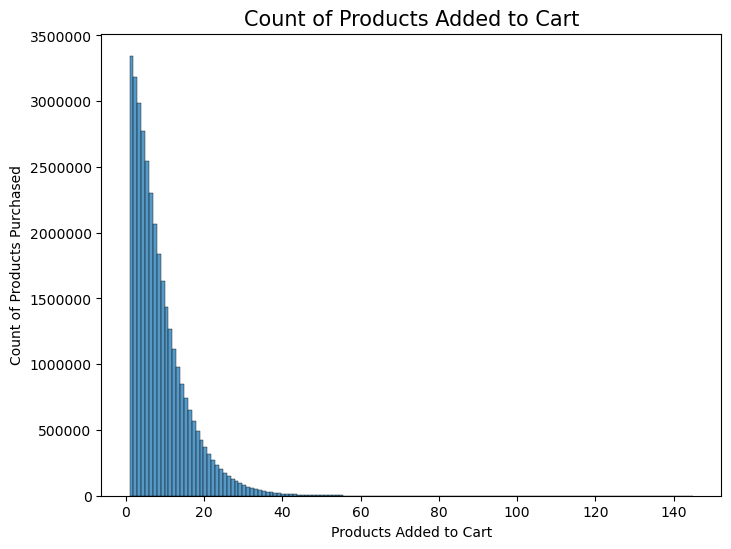

In [7]:
plt.subplots(figsize=(8, 6))
plt.title(label="Count of Products Added to Cart",fontsize=15,color="black")
sns.histplot(data=data, x='add_to_cart_order', bins=145)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Products Added to Cart');
plt.ylabel('Count of Products Purchased');

__Answer A1:__ We can see from the above that Instacart orders from our dataset take on a right-skewed distribution with mean of 10.11 products per order, and a median of 8 products per order.  Customers in our dataset purchased between 1 and 145 products in their orders, but a strong majority of orders were kept below 20 products.

This is an indicator, although not a firm conclusion, that the customer base for Instacart uses the app for short-term grocery and convenience needs rather than for comprehensive food, personal, care, and home items.

__Question A2:__ How many products were added to the cart in what order?

In [26]:
prodid_by_cart= data.groupby('add_to_cart_order')['product_id'].count().reset_index()
prodid_by_cart_sort= prodid_by_cart.sort_values(by='add_to_cart_order').reset_index(drop=True)
prodid_by_cart_sort

,add_to_cart_order,product_id
0,1,3346083
1,2,3182490
2,3,2988129
3,4,2773069
4,5,2542770
...,...,...
140,141,1
141,142,1
142,143,1
143,144,1


__Answer A2:__ This output gives us an insight on how big the orders usually are. It makes sense that as the `add_to_cart_order` increases, the `product_id` amount decreases, considering orders are typically under 20 products.  We can also see here that the maximum of products ordered in one single order was 145.  

In fact, all orders with 45 or more products were purchased by the same customer, Customer 22906.  This customer's last order, which was their fourth, included the maximum value shown above of 145 products.  We learned through this customer that one dissimilar customer can skew a distribution of purchasing behavior.

__Question A3:__ How routinely do Instacart users order something from the app?

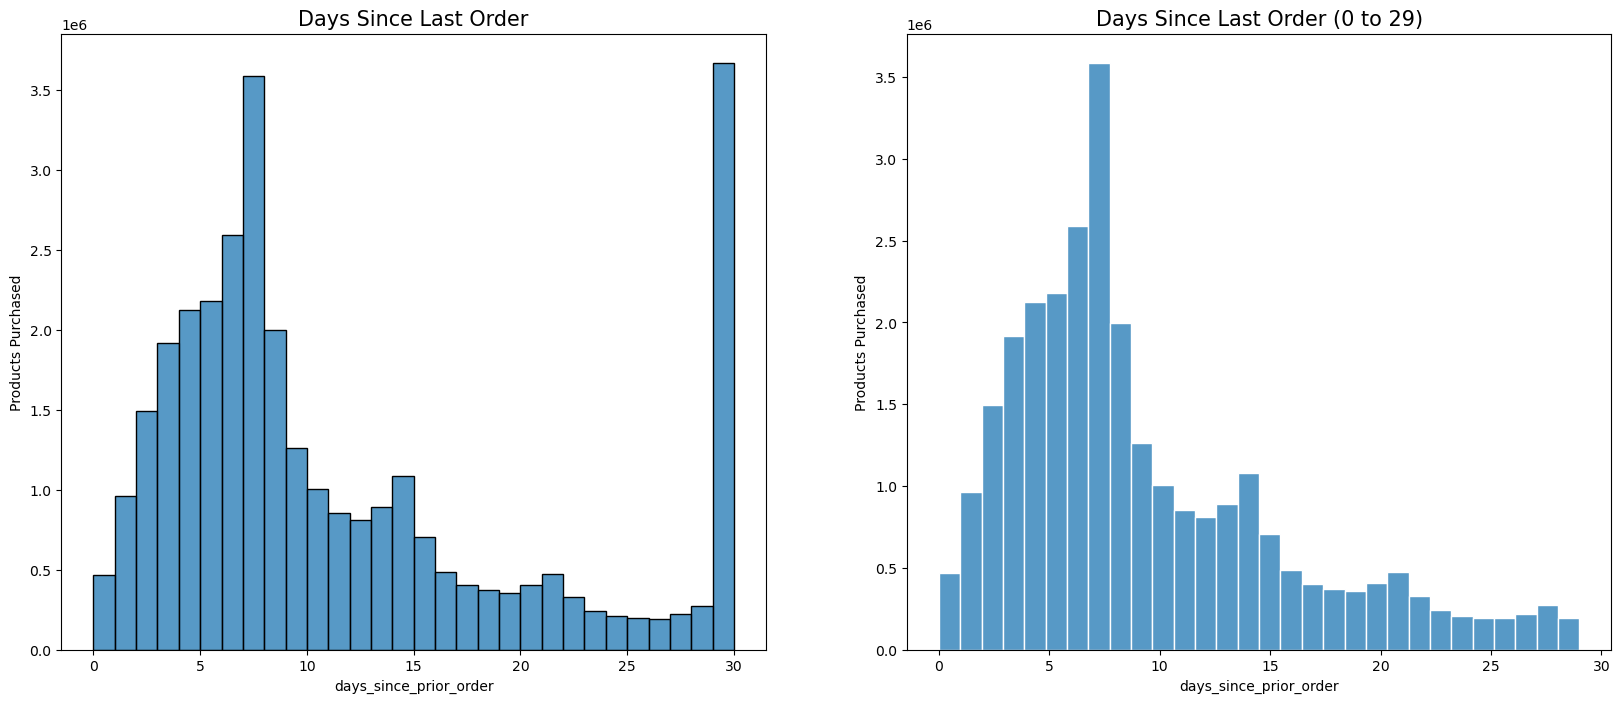

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.histplot(data['days_since_prior_order'],bins = 30,ax=ax1).set_title("Days Since Last Order", fontsize = 15)
sns.set(font_scale=1)
ax1.set_facecolor("white")
ax1.grid(False)
ax1.set_ylabel('Products Purchased')
sns.histplot(data_no30['days_since_prior_order'],bins= 30,ax=ax2).set_title('Days Since Last Order (0 to 29)',fontsize = 15)
ax2.set_ylabel('Products Purchased')
ax2.grid(False)
ax2.set_facecolor("white")
plt.show()

__Answer A3__: Upon first glance, it appears as though users return to the app every 11.36 days on average.  However, the histogram of `days_since_prior_order` reveals a large population in the bin representing customers who last ordered 30 days ago.  When we dig further into the dataset, we find that `days_since_prior_order`= 30 is the value given to all customers whose last order was 30 *or more* days ago.  As a result, the median of 8 days may be a better measure of center for this variable.

When we create a new DataFrame which drops the bin for `days_since_prior_order`= 30, you can see a more normal distribution over this variable.

In [67]:
data_no30 = data[data['days_since_prior_order'] != 30]
data_no30['days_since_prior_order'].describe()

count   28263716.00
mean           9.07
std            6.46
min            0.00
25%            5.00
50%            7.00
75%           12.00
max           29.00
Name: days_since_prior_order, dtype: float64

In [8]:
data['days_since_prior_order'].describe()

count    3.174104e+07
mean     1.136415e+01
std      8.940500e+00
min      0.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

When shown in the context of a users' number of orders from Instacart since they joined, we see that longer duration customers tend to buy at faster pace on average than newer users.

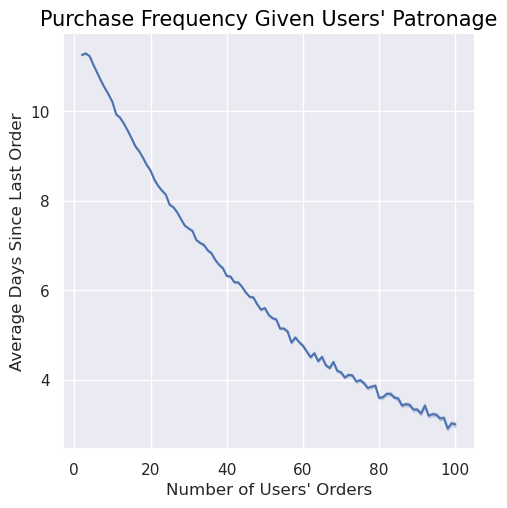

In [13]:
sns.relplot(data=data_no30, x='order_number', y='days_since_prior_order', kind='line')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('''Number of Users' Orders''');
plt.ylabel('Average Days Since Last Order');
plt.title(label="Purchase Frequency Given Users' Patronage",fontsize=15,color="black");

As mentioned in our data cleaning steps, the dataset placed all products from single-order (`order_number`= 1) Instacart users into `days_since_prior_order`= NA.  If we had imputed these null values as 0, indicating that all products from single-order users were purchased today, we would driven down the mean, as shown below with the alias 'fill_zeros'.

In [14]:
fill_zeros = data['days_since_prior_order'].fillna(0)
fill_zeros.describe()

count    3.381911e+07
mean     1.066586e+01
std      9.081234e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

However, if we imputed the mean or median, as in the case of 'fill_mean' and 'fill_median', the center is less affected. Since we would likely use this question to inform when to remind Instacart users to shop, we may want to elect for an earlier estimate of center in order to encourage a more prompt return to the app.

In [15]:
fill_mean = data['days_since_prior_order'].fillna(data['days_since_prior_order'].mean())
fill_mean.describe()

count    3.381911e+07
mean     1.136415e+01
std      8.661464e+00
min      0.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

In [16]:
fill_median = data['days_since_prior_order'].fillna(data['days_since_prior_order'].median())
fill_median.describe()

count    3.381911e+07
mean     1.115744e+01
std      8.699060e+00
min      0.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

Now we'll look at the `days_since_prior_order` in the context of department subgroups.

In [17]:
#Non-food items:
non_food_purchases = data_no30[data_no30['department'].isin(['household', 'personal care', 'babies', 'pets'])]

In [18]:
non_food_purchases.pivot_table(values='days_since_prior_order', index='department', aggfunc=['mean', 'median', lambda x: x.mode()])

,mean,median,<lambda>
,days_since_prior_order,days_since_prior_order,days_since_prior_order
department,,,
babies,8.405563,7.0,7.0
household,9.490331,7.0,7.0
personal care,9.191233,7.0,7.0
pets,9.732548,8.0,7.0


In [19]:
#Basic need items:
Basic_need_purchases = data_no30[data_no30['department'].isin(['produce', 'dairy eggs', 'deli', 'meat seafood'])]

In [20]:
Basic_need_purchases.pivot_table(values='days_since_prior_order', index='department', aggfunc=['mean', 'median', lambda x: x.mode()])

,mean,median,<lambda>
,days_since_prior_order,days_since_prior_order,days_since_prior_order
department,,,
dairy eggs,9.029398,7.0,7.0
deli,9.261912,7.0,7.0
meat seafood,9.290571,7.0,7.0
produce,8.933209,7.0,7.0


In [21]:
#Breakfast and Frozen items:
Breakfast_and_frozen_purchases = data_no30[data_no30['department'].isin(['breakfast', 'frozen'])]

In [22]:
Breakfast_and_frozen_purchases.pivot_table(values='days_since_prior_order', index='department', aggfunc=['mean', 'median', lambda x: x.mode()])

,mean,median,<lambda>
,days_since_prior_order,days_since_prior_order,days_since_prior_order
department,,,
breakfast,9.235947,7.0,7.0
frozen,9.496125,7.0,7.0


In [23]:
#Junk food items:
Junk_food_purchases = data_no30[data_no30['department'].isin(['bakery', 'snacks','canned goods', 'alcohol','beverages'])]

In [24]:
Junk_food_purchases.pivot_table(values='days_since_prior_order', index='department', aggfunc=['mean', 'median', lambda x: x.mode()])

,mean,median,<lambda>
,days_since_prior_order,days_since_prior_order,days_since_prior_order
department,,,
alcohol,8.358826,7.0,7.0
bakery,9.079318,7.0,7.0
beverages,9.039407,7.0,7.0
canned goods,9.397328,7.0,7.0
snacks,9.013550,7.0,7.0


In [25]:
#International and pantry items:
Intl_and_pantry_purchases = data_no30[data_no30['department'].isin(['international', 'dry goods pasta','pantry'])]

In [26]:
Intl_and_pantry_purchases.pivot_table(values='days_since_prior_order', index='department', aggfunc=['mean', 'median', lambda x: x.mode()])

,mean,median,<lambda>
,days_since_prior_order,days_since_prior_order,days_since_prior_order
department,,,
dry goods pasta,9.482957,7.0,7.0
international,9.086450,7.0,7.0
pantry,8.935945,7.0,7.0


In [68]:
#Other items:
Other_purchases = data_no30[data_no30['department'].isin(['missing', 'other','bulk'])]

In [28]:
Other_purchases.pivot_table(values='days_since_prior_order', index='department', aggfunc=['mean', 'median', lambda x: x.mode()])

,mean,median,<lambda>
,days_since_prior_order,days_since_prior_order,days_since_prior_order
department,,,
bulk,8.445357,7.0,7.0
missing,8.626659,7.0,7.0
other,8.803839,7.0,7.0


From this analysis we can conclude that customers show similar behavior across all departments, tending to buy weekly, or every 8 or 9 days.

**Question A4:** Which days have the highest volume of orders?

In [29]:
data.groupby('order_dow')['order_id'].count().sort_values(ascending = False)

order_dow
0    6533692
1    5871834
6    4707583
5    4386443
2    4378360
3    3998498
4    3942696
Name: order_id, dtype: int64

**Answer A4:** Saturday has the highest number of orders followed by Sunday and Friday.  This is useful to know in preparation for targeting ads toward consumers around their shopping schedules.

Now we'll look at the `order_hour_of_day` and `order_dow` in the context of department subgroups.

In [30]:
#Non-food items:
non_food_purchases.pivot_table(values='order_hour_of_day', index='department', aggfunc=['mean', 'median', lambda x: x.mode()])

,mean,median,<lambda>
,order_hour_of_day,order_hour_of_day,order_hour_of_day
department,,,
babies,13.396394,13,9
household,13.344022,13,10
personal care,13.477515,13,10
pets,13.571207,14,16


In [31]:
non_food_purchases.pivot_table(values='order_dow', index='department', aggfunc=lambda x: x.mode())

,order_dow
department,
babies,0
household,0
personal care,0
pets,0


In [32]:
#Basic need items:
Basic_need_purchases.pivot_table(values='order_hour_of_day', index='department', aggfunc=['mean', 'median', lambda x: x.mode()])

,mean,median,<lambda>
,order_hour_of_day,order_hour_of_day,order_hour_of_day
department,,,
dairy eggs,13.352597,13,10
deli,13.469082,13,11
meat seafood,13.461061,13,14
produce,13.415108,13,10


In [33]:
Basic_need_purchases.pivot_table(values='order_dow', index='department', aggfunc=lambda x: x.mode())

,order_dow
department,
dairy eggs,0
deli,0
meat seafood,0
produce,0


In [34]:
#Junk food items:
Junk_food_purchases.pivot_table(values='order_hour_of_day', index='department', aggfunc=['mean', 'median', lambda x: x.mode()])

,mean,median,<lambda>
,order_hour_of_day,order_hour_of_day,order_hour_of_day
department,,,
alcohol,13.595239,14,15
bakery,13.381800,13,10
beverages,13.294329,13,10
canned goods,13.447663,13,11
snacks,13.344254,13,10


In [35]:
Junk_food_purchases.pivot_table(values='order_dow', index='department', aggfunc=lambda x: x.mode())

,order_dow
department,
alcohol,5
bakery,0
beverages,1
canned goods,0
snacks,1


In [36]:
#Breakfast and Frozen items:
Breakfast_and_frozen_purchases.pivot_table(values='order_hour_of_day', index='department', aggfunc=['mean', 'median', lambda x: x.mode()])

,mean,median,<lambda>
,order_hour_of_day,order_hour_of_day,order_hour_of_day
department,,,
breakfast,13.312395,13,10
frozen,13.671456,14,15


In [37]:
Breakfast_and_frozen_purchases.pivot_table(values='order_dow', index='department', aggfunc=lambda x: x.mode())

,order_dow
department,
breakfast,1
frozen,0


In [38]:
#International and pantry items:
Intl_and_pantry_purchases.pivot_table(values='order_hour_of_day', index='department', aggfunc=['mean', 'median', lambda x: x.mode()])

,mean,median,<lambda>
,order_hour_of_day,order_hour_of_day,order_hour_of_day
department,,,
dry goods pasta,13.537464,13,14
international,13.511047,13,15
pantry,13.446881,13,11


In [39]:
Intl_and_pantry_purchases.pivot_table(values='order_dow', index='department', aggfunc=lambda x: x.mode())

,order_dow
department,
dry goods pasta,0
international,0
pantry,0


In [69]:
#Other items:
Other_purchases.pivot_table(values='order_hour_of_day', index='department', aggfunc=['mean', 'median', lambda x: x.mode()])

,mean,median,<lambda>
,order_hour_of_day,order_hour_of_day,order_hour_of_day
department,,,
bulk,13.44,13,10
missing,13.47,13,10
other,13.50,13,15


In [40]:
Other_purchases.pivot_table(values='order_dow', index='department', aggfunc=lambda x: x.mode())

,order_dow
department,
bulk,1
missing,0
other,0


From this analysis by categories, we can conclude that although the majority of the departments have a similar behavior in which customers tend to buy at 1 PM on Saturdays, some departments show a different order_dow. 

The Alcohol department, for example, shows Thursday as the day in which people buy the most. Additionally,the departments of Beverages, Snacks, Breakfast and Bulk, show Sunday instead. This is a veyr important finding becaus eit will help 

**Question A5:** When do the most orders take place during the day?

In [41]:
data.pivot_table(values=['order_id'], index='order_hour_of_day',aggfunc={'order_id':'count'})\
.sort_values('order_id',ascending=False).head()

,order_id
order_hour_of_day,
10,2874905
11,2852701
14,2810918
15,2780731
13,2778054


**Answer A5:** Most orders are placed between 10am-12pm and 1pm-4pm.  The fewest orders are placed between 1am-5am.

**Question A6:** What are the peak order hours on Saturdays?

In [61]:
saturday=data[data['order_dow'] == 'Saturday']
hour_per_day_sat=saturday.pivot_table(values=['order_id'], index='order_hour_of_day',aggfunc={'order_id':'count'})
hour_per_day_sat.sort_values('order_id',ascending=False).head()

,order_id
order_hour_of_day,
14,595896
13,587135
15,581287
11,564267
12,563020


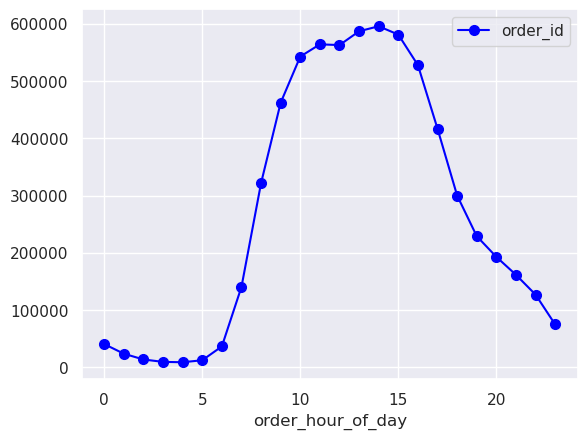

In [63]:
data.groupby((saturday['order_hour_of_day']))['order_id'].count().plot(kind = 'line',marker='o', markersize=7, color='blue',legend=True)
plt.ticklabel_format(style='plain', axis='y')

**Answer A6:** On Saturdays the peak order time is between 11pm-4pm.  Our marketing strategies to Instacart consumers should aim to reach users before this time if we are to influence their shopping behavior for that order.

__Question A7:__ How many orders do Instacart customers place?

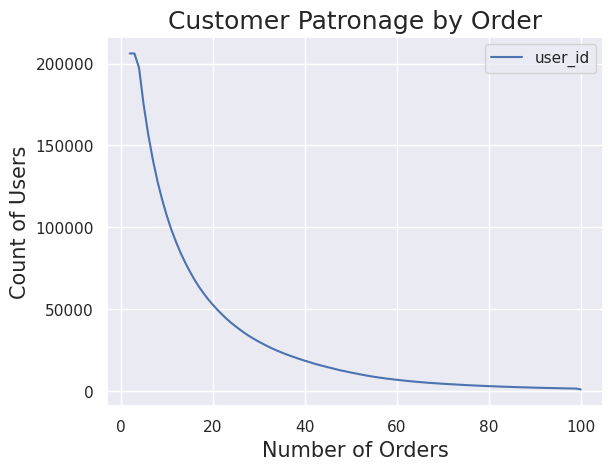

In [67]:
user_orders = data.dropna().groupby('order_number')['user_id'].nunique()
user_orders.plot(kind = 'line', legend=True)
plt.xlabel("Number of Orders", size=15)
plt.ylabel("Count of Users", size=15)
plt.title("Customer Patronage by Order", size=18);

In [68]:
user_orders.max()

206209

In [69]:
user_orders.median()

10700.0

__Answer A7:__ As you can see from the above, our dataset comprises a range of `order_number`s from 1 to 100, with only 10,700 out of 206,209 unique users (just over 5%) ordering at least 50 times.  Interestingly, no user has fewer than 3 orders in this population.

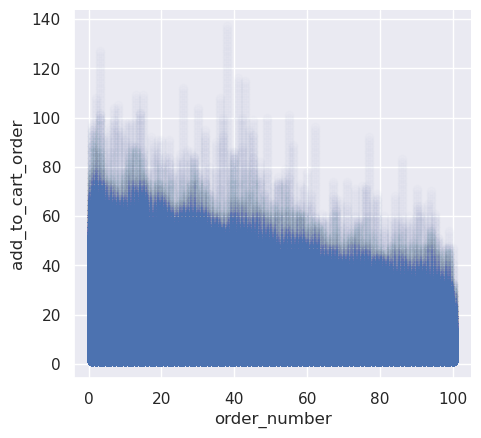

In [70]:
g = sns.PairGrid(data_no30, y_vars='add_to_cart_order', x_vars='order_number', height=4.5, aspect=1.1)
g.map(plt.scatter, alpha=0.01);

Furthermore, as a users' patronage increases it appears as though the size of their orders decrease gradually.  This could mean that returning customers focus on a set arrangement of products, and could be harder to convince to purchase new or different products.  This phenomenon is also likely enabled by Instacart's automatic reordering, allowing users to order the same few products on a recurring basis.

<hr>

### B. Understanding Reordering Behavior

__Question B1:__ How often do customers reorder the same items?

In [77]:
reorder_status = data.groupby('reordered')['product_id'].count()
reorder_status

reordered
0    13863746
1    19955360
Name: product_id, dtype: int64

Number of products  that  are reordered  19955360 , ( 59.00617242809434 %)
Number of products  that  are not reordered  13863746 , ( 40.993827571905655 %)


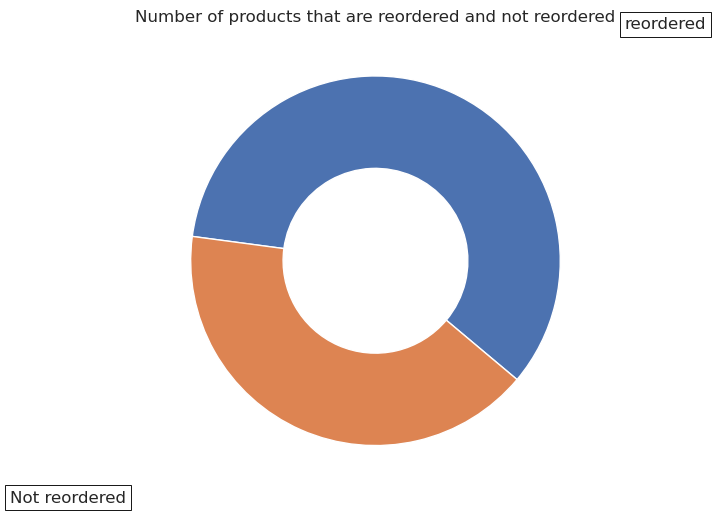

In [78]:
y_value_counts = data.reordered.value_counts()
print("Number of products  that  are reordered ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of products  that  are not reordered ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["reordered", "Not reordered"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Number of products that are reordered and not reordered")

plt.show()


In [79]:
percent_reordered = reorder_status[1] / (reorder_status[0] + reorder_status[1])
percent_reordered

0.5900617242809434

__Answer B1:__ `reorder_status` above shows the number of items that were reordered (1) and that were not reordered (0). `percent_reordered` can be interpreted as the ratio of products ordered by their reorder status.  Since 59% of orders were reordered products, we can derive that Instacart users return to the platform for the same goods more often than not.  This is useful information in approaching customers with ads and deals for products they have purchased previously.

__Question B2:__ Which departments have the lowest and highest incidence of reordering?

In [8]:
dept_by_reord = data.groupby('department')['reordered'].count().reset_index()
dept_by_reord_sort = dept_by_reord.sort_values(by='reordered').reset_index(drop=True)
dept_by_reord_sort.head()

,department,reordered
0,bulk,35932
1,other,38086
2,missing,77396
3,pets,102221
4,alcohol,159294


In [9]:
dept_most_reord = data.groupby('department')['reordered'].count().reset_index()
dept_most_reord_sort= dept_most_reord.sort_values(by='reordered', ascending=False).reset_index(drop=True)
dept_most_reord_sort.head()

,department,reordered
0,produce,9888378
1,dairy eggs,5631067
2,snacks,3006412
3,beverages,2804175
4,frozen,2336858


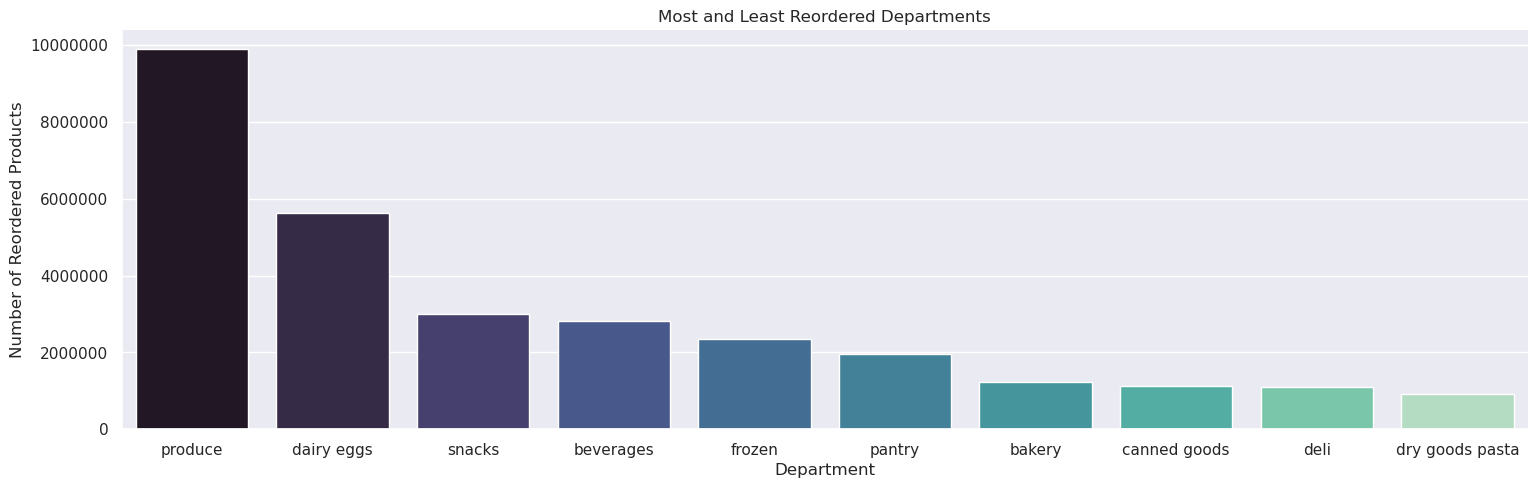

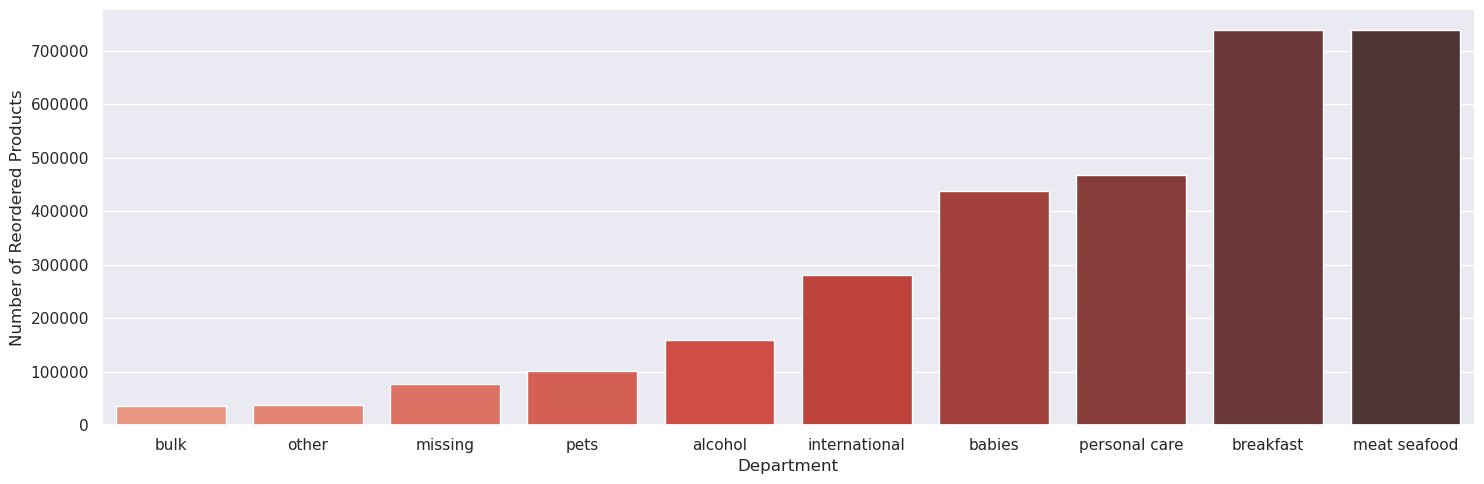

In [61]:
prod= dept_by_reord_sort.head(10)
prod2= dept_most_reord_sort.head(10)

sns.catplot(prod2, x='department', y='reordered', kind='bar', palette='mako', aspect=3);
plt.ticklabel_format(style='plain', axis='y');
plt.title('Most and Least Reordered Departments');
plt.xlabel('Department');
plt.ylabel('Number of Reordered Products');
sns.catplot(prod, x='department', y='reordered', kind='bar', palette='Reds_d', aspect=3);
plt.xlabel('Department');
plt.ylabel('Number of Reordered Products');

__Answer B2:__ The department that has the lowest number of items reordered is the bulk department which makes sense since bulk items come in large quantities that might not be ordered again for longer periods of time than other items.

The departments with the most reordered items are produce, dairy and eggs, snacks, and beverages, which also makes sense, considering these departments carry perishable items that customers may frequently purchase.

__Note:__ If the above graph from plotly is not displayed, see appendix __[here](#section-vi)__.

__Question B3:__ Which are the most reordered items in each department?

In [101]:
data.groupby(['product_name', 'department','reordered'])['order_id']\
.aggregate('count').unstack().sort_values(by=1,ascending=False).head(10)

,reordered,0,1
product_name,department,,
Banana,produce,76125.0,415166.0
Bag of Organic Bananas,produce,65655.0,329275.0
Organic Strawberries,produce,61129.0,214448.0
Organic Baby Spinach,produce,56766.0,194939.0
Organic Hass Avocado,produce,44704.0,176173.0
Organic Avocado,produce,43954.0,140270.0
Organic Whole Milk,dairy eggs,24129.0,118684.0
Large Lemon,produce,48614.0,112178.0
Organic Raspberries,produce,32915.0,109688.0


__Answer B3:__ The grid above shows the count of reorders for the top reordered products on Instacart.  This list again shows the focus of Instacart shoppers on perishable goods, and for the first time in our analysis, we see a preference toward organic produce in 6/10 of the highest reordered rankings.

This could potentially inspire future analysis on consumer behavior surrounding reorders for organic versus non-organic foods.  The products shown above may also be good candidates for recommendation to users given their high success in being reordered and the known preference of Instacart users to shop the produce and dairy and eggs department.

__Question B4:__ What is the count of the minimum and maximum products ordered by a single user in their lifetime?

In [105]:
count_orders = data.groupby('user_id')['product_id'].agg(lambda group: len(group.unique()))

In [106]:
print("Minimum products ordered by the users:", count_orders.min())

Minimum products ordered by the users: 1


In [107]:
print("Maximum products ordered by the users:", count_orders.max())

Maximum products ordered by the users: 728


__Answer B4:__ As we have already seen, there is a broad range of products that the users of Instacart can order from. The minimum number of products ordered by a user is 1 and the maximum number of products ordered by a user is 728. The count of products denote the orders placed by any user during their Instacart lifetime. 

__Question B5:__ What are other variables' interaction with `reordered`?

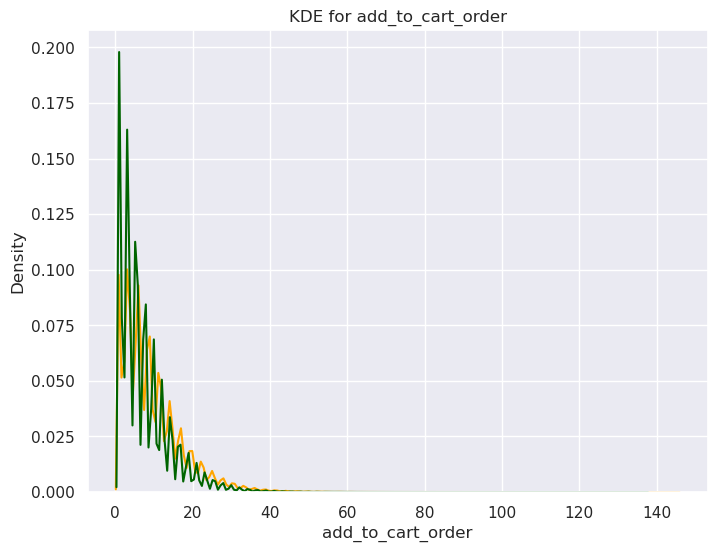

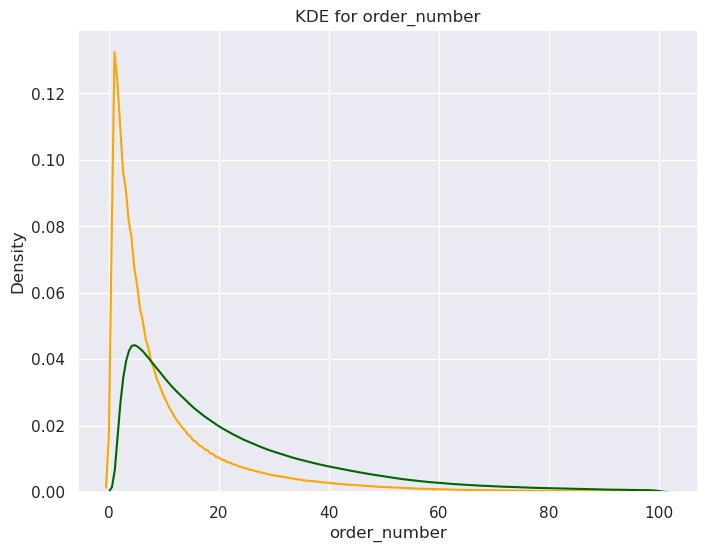

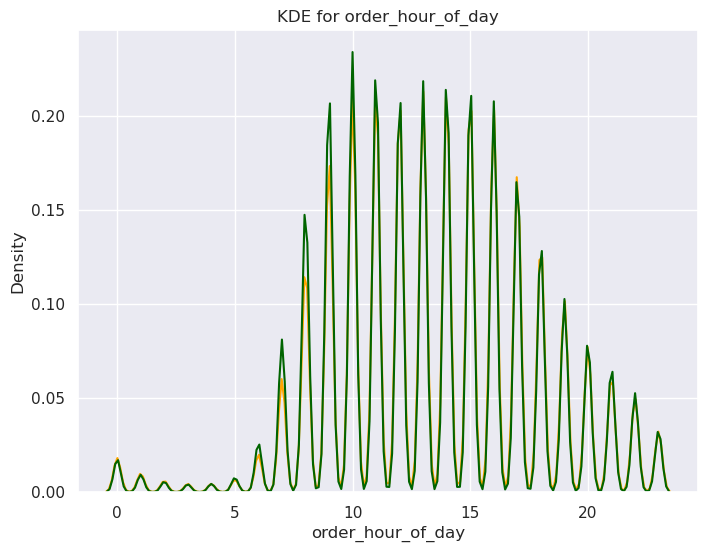

In [64]:
def kdeplot(feature):
    plt.figure(figsize=(8, 6))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(data[data['reordered'] == 0][feature].dropna(), color= 'orange', label= 'Reorder: No')
    ax1 = sns.kdeplot(data[data['reordered'] == 1][feature].dropna(), color= 'darkgreen', label= 'Reorder: Yes')
kdeplot('add_to_cart_order')
kdeplot('order_number')
kdeplot('order_hour_of_day')

__Answer B5:__ While reordered (orange) and non-reordered (blue) products both show a high density at low values of `add_to_cart_order`, it is clear that more users place reordered products in their cart early.  As carts reach around 20 items or more, it appears in this first graph that users begin to experiment more with items they may not reorder.

The second kernel density estimation (KDE) plot shows a high density of non-reordered products occuring early in a users' Instacart patronage.  This may also demonstrate a willingness to try new products as a new user, or more likely it is a result of churning customers.  If a customer leaves the platform early, they have less likelihood of converting a non-reordered product to a reordered one.

Finally, the third plot shows that customers purchase new products and reorder the same products at about the same frequency independent of the time of day.  This informs us that marketing new products 

<hr>

### C. Insights on Departments

**Question C1:** How many unique products are offered in each department?

In [109]:
data.groupby('department')['product_id'].nunique().sort_values(ascending = False)

department
personal care      6563
snacks             6264
pantry             5370
beverages          4364
frozen             4007
dairy eggs         3449
household          3085
canned goods       2092
dry goods pasta    1858
produce            1684
bakery             1516
deli               1322
missing            1258
international      1139
breakfast          1114
babies             1081
alcohol            1054
pets                972
meat seafood        907
other               548
bulk                 38
Name: product_id, dtype: int64

__Answer C1:__ The personal care department has the highest number of products, and bulk has the fewest.  There are 1,258 products listed on Instacart that are missing a department, shown here in the 'missing' category.

**Question C2:** Which departments have the highest number of orders?

In [110]:
d4= data.groupby('department')['order_id'].count().sort_values(ascending = False)
d4

department
produce            9888378
dairy eggs         5631067
snacks             3006412
beverages          2804175
frozen             2336858
pantry             1956819
bakery             1225181
canned goods       1114857
deli               1095540
dry goods pasta     905340
household           774652
meat seafood        739238
breakfast           739069
personal care       468693
babies              438743
international       281155
alcohol             159294
pets                102221
missing              77396
other                38086
bulk                 35932
Name: order_id, dtype: int64

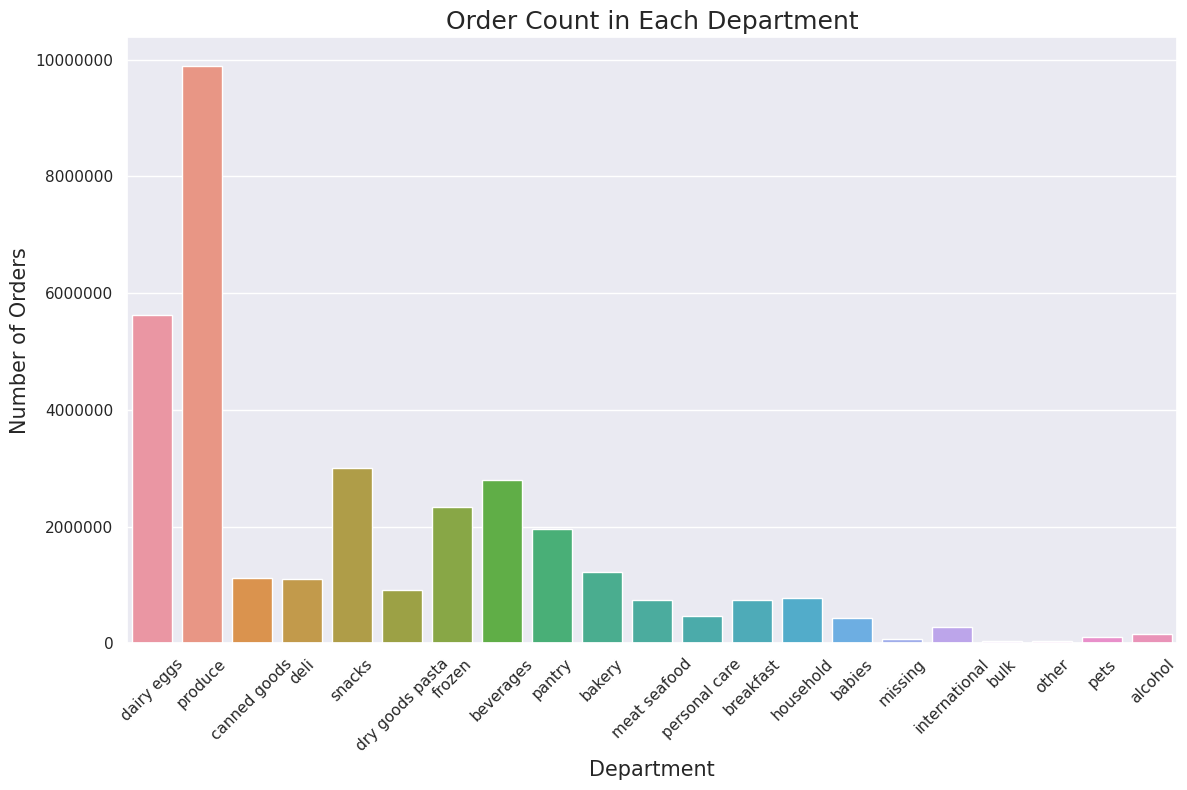

In [111]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 10});

sns.countplot(x="department", 
              data=data);
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45);
plt.xlabel("Department", size=15);
plt.ylabel("Number of Orders", size=15);
plt.title("Order Count in Each Department", size=18);
plt.tight_layout()

**Answer C2:** The departments with the highest number of orders are produce, dairy eggs, snacks, beverages and frozen.  This further informs why customers are using Instacart-- they come for fresh foods with short shelf lives, snacks, and beverages, reinforcing the convenience interest in our customer base.

Other and bulk departments have the lowest number of orders, which follows suit with their having the least number of available products.  

This ranking matches those of the least and most reordered products, showing that not only do customers shop these departments the most, they also are most likely to reorder the same products from these departments.

__Question C3__: What is the overall percentage of each of the departments on Instacart?

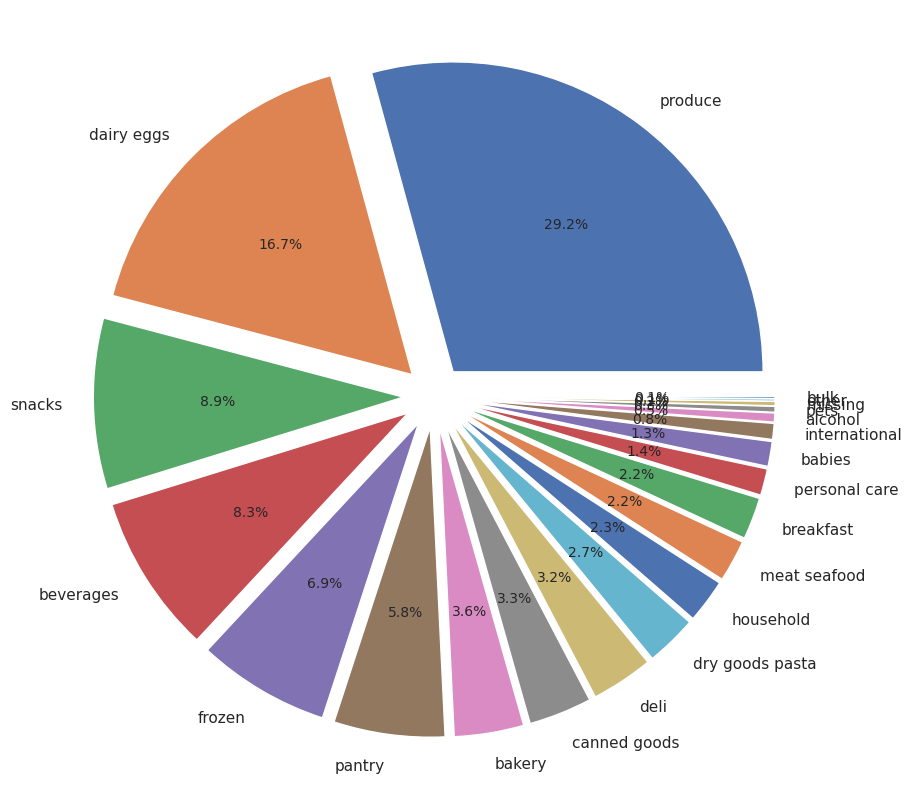

In [112]:
import matplotlib as mpl
data['department'].value_counts().plot\
                                 .pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',\
                                  shadow=False,figsize=(10,12)).set_ylabel('')
mpl.rcParams.update({'font.size': 10})
plt.show()

__Answer C2__: In the pie chart above, we observe that the produce department has the maximum orders, accounting for nearly half of the department that closely follows it, i.e. dairy eggs. The user base of Instacart is mainly centered on fresh daily use products, which clearly sets a primary focus point for marketing to the existing user base.

**Question C3:** What are the top 5 selling products in each department?

In [113]:
dep_list = list(data.department.unique())

for dep in dep_list:
    print('\n' + dep)
    print(data[data['department'] == dep].groupby('product_name').agg({'order_id': 'count'}).sort_values(by='order_id', ascending=False).head())


dairy eggs
                                 order_id
product_name                             
Organic Whole Milk                 142813
Organic Half & Half                 79006
Half & Half                         71641
Organic Whole String Cheese         61669
Organic Unsweetened Almond Milk     60071

produce
                        order_id
product_name                    
Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877

canned goods
                           order_id
product_name                       
Organic Black Beans           39577
Organic Garbanzo Beans        31196
No Salt Added Black Beans     29174
Organic Diced Tomatoes        22834
Organic Tomato Paste          18336

deli
                               order_id
product_name                           
Original Hummus                   74172
Uncured Genoa Salami              43261
Organic Extra Firm Tof

__Answer C3:__ In the absence of a personalized Instacart experience, these items would stand as good recommendations for customers based on others' top purchases.

<hr>

<a id="section-iv"></a>

## IV. Analysis on Organic Products

[Back to Top](#top)

__Question O1__ : How many organic products are there? What is the overall percentage of organic and non organic products?

In [30]:
data['product_name'] = data['product_name'].str.upper()

In [31]:
data['ORGANIC'] = data['product_name'].str.contains("ORGANIC")

In [32]:
data.groupby('ORGANIC')['order_id'].count()

ORGANIC
False    23162774
True     10656332
Name: order_id, dtype: int64

In [33]:
data.ORGANIC.value_counts(normalize=True)

False   0.68
True    0.32
Name: ORGANIC, dtype: float64

__Answer O1:__ Instacart users have ordered 10,656,332 organic goods. More than one-third of all orders contain organic products. With organic products accounting for such a large portion of the sales, it is vital to understand how this specific product genre has evolved and how we can focus on incorporating this into Instacart's inventory to enable users to purchase more organic products as the situation holds. Furthermore, it is also one of the key areas for Instacart to go deeper into the organic world and focus more on expanding organic goods for multiple departments.

In [34]:
data['ORGANIC'].unique()

array([False,  True])

In [35]:
data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,ORGANIC
0,1,49302,1,1,BULGARIAN YOGURT,16,112108,4,Wednesday,10,9.00,dairy eggs,False
1,1,11109,2,1,ORGANIC 4% MILK FAT WHOLE MILK COTTAGE CHEESE,16,112108,4,Wednesday,10,9.00,dairy eggs,True
2,1,22035,8,1,ORGANIC WHOLE STRING CHEESE,16,112108,4,Wednesday,10,9.00,dairy eggs,True
3,816049,49302,7,1,BULGARIAN YOGURT,16,47901,14,Wednesday,6,16.00,dairy eggs,False
4,816049,22035,14,0,ORGANIC WHOLE STRING CHEESE,16,47901,14,Wednesday,6,16.00,dairy eggs,True


In [36]:
data[['ORGANIC', 'product_name']].head(10)

,ORGANIC,product_name
0,False,BULGARIAN YOGURT
1,True,ORGANIC 4% MILK FAT WHOLE MILK COTTAGE CHEESE
2,True,ORGANIC WHOLE STRING CHEESE
3,False,BULGARIAN YOGURT
4,True,ORGANIC WHOLE STRING CHEESE
5,False,CREAM CHEESE CREAM CHEESE SPREAD
6,False,BULGARIAN YOGURT
7,False,BULGARIAN YOGURT
8,True,ORGANIC MILK
9,False,UNSWEETENED ALMONDMILK


In [37]:
# creating a new dataframe for organic products
organic = data[data['ORGANIC'] == True]

In [38]:
organic.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,ORGANIC
1,1,11109,2,1,ORGANIC 4% MILK FAT WHOLE MILK COTTAGE CHEESE,16,112108,4,Wednesday,10,9.00,dairy eggs,True
2,1,22035,8,1,ORGANIC WHOLE STRING CHEESE,16,112108,4,Wednesday,10,9.00,dairy eggs,True
4,816049,22035,14,0,ORGANIC WHOLE STRING CHEESE,16,47901,14,Wednesday,6,16.00,dairy eggs,True
8,1383349,1463,3,0,ORGANIC MILK,16,41425,4,Tuesday,8,14.00,dairy eggs,True
14,2445303,35951,6,1,ORGANIC UNSWEETENED ALMOND MILK,16,199120,49,Tuesday,20,7.00,dairy eggs,True


In [39]:
# creating a new dataframe for non organic products
nonorganic = data[data['ORGANIC'] == False]

In [40]:
nonorganic.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,ORGANIC
0,1,49302,1,1,BULGARIAN YOGURT,16,112108,4,Wednesday,10,9.00,dairy eggs,False
3,816049,49302,7,1,BULGARIAN YOGURT,16,47901,14,Wednesday,6,16.00,dairy eggs,False
5,816049,35176,5,1,CREAM CHEESE CREAM CHEESE SPREAD,16,47901,14,Wednesday,6,16.00,dairy eggs,False
6,1242203,49302,1,1,BULGARIAN YOGURT,16,2993,15,Saturday,7,7.00,dairy eggs,False
7,1383349,49302,11,1,BULGARIAN YOGURT,16,41425,4,Tuesday,8,14.00,dairy eggs,False


__Question O2__: What are the top 10 most and least ordered organic products from all departments?

In [41]:
# most ordered
organic.groupby('product_name')['department'].count().sort_values(ascending=False).head(10)

product_name
BAG OF ORGANIC BANANAS    394930
ORGANIC STRAWBERRIES      275577
ORGANIC BABY SPINACH      251705
ORGANIC HASS AVOCADO      220877
ORGANIC AVOCADO           184224
ORGANIC WHOLE MILK        142813
ORGANIC RASPBERRIES       142603
ORGANIC YELLOW ONION      117716
ORGANIC GARLIC            113936
ORGANIC ZUCCHINI          109412
Name: department, dtype: int64

In [42]:
# least ordered
organic.groupby('product_name')['department'].count().sort_values(ascending=True).head(10)

product_name
FLAX OIL, ORGANIC, OMEGA-3, ORIGINAL FORMULA       1
ORGANIC BETTER REST TEA BLEND                      1
KB CLB STICK ORGANIC FMLY                          1
ORGANIC ALEPPO PEPPER                              1
ORGANIC ICE CREAM BIRTHDAY CAKE                    1
ORGANIC VEGGIE GROUND                              1
PASTA & ENCHILADA SAUCE, ORGANIC, 7 VEGGIE         1
ZERO CALORIE ORGANIC ROOT BEER FRIDGE PACK SODA    2
ORGANIC CHAMOMILE HERBAL TEA BAGS                  2
ORGANIC CHAMOMILE CITRUS TEA                       2
Name: department, dtype: int64

__Answer O2__: The ten most popular organic products are shown above. All of these products are from the produce department, with the 'BAG OF ORGANIC BANANAS' receiving the most orders (394,930). In comparison, there are seven organic products with a count of just 1 among the other least ordered organic products. These products are from a variety of other departments. 

__Question O3__: What is the comparison of organic products ordered in each department?

In [43]:
sns.set(rc={'figure.figsize':(12,12)})

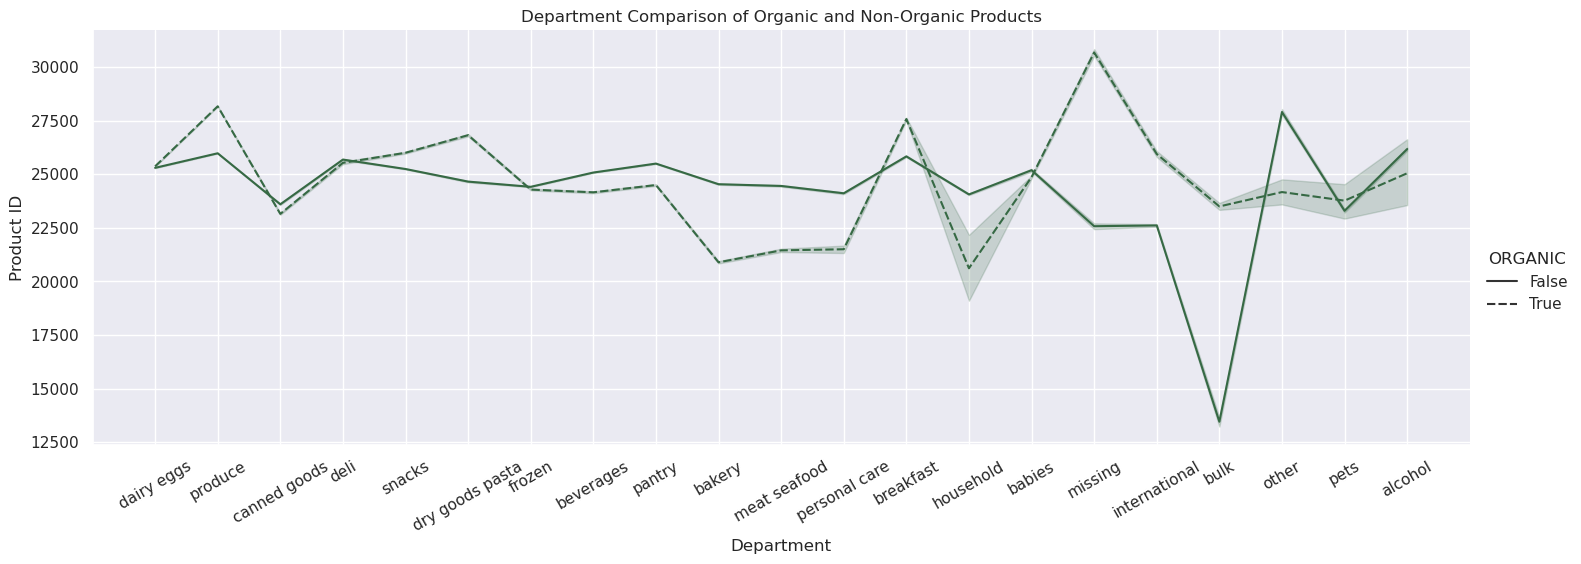

In [45]:
g = sns.relplot(y='product_id', x='department', data=data, kind='line', style='ORGANIC', color='#366944', aspect=3)
for ax in g.axes.flatten(): 
    for tick in ax.get_xticklabels(): 
        tick.set(rotation=30)
        
plt.title('Department Comparison of Organic and Non-Organic Products')
plt.xlabel('Department')
plt.ylabel('Product ID')
plt.show()

__Answer O3__: The graph above compares organic and non-organic products from each department. The dotted line denotes organic products, whereas the straight line denotes non-organic products. As we see, the organic product counts are greater in the departments dairy eggs, produce, snacks, dry goods pasta, breakfast, bulk, and pets than others. It is obvious that the amount of organic products in various departments that contain fresh or other pantry items appears to be higher. This also suggests that individuals often purchase organic products depending on their diets and other preferences.

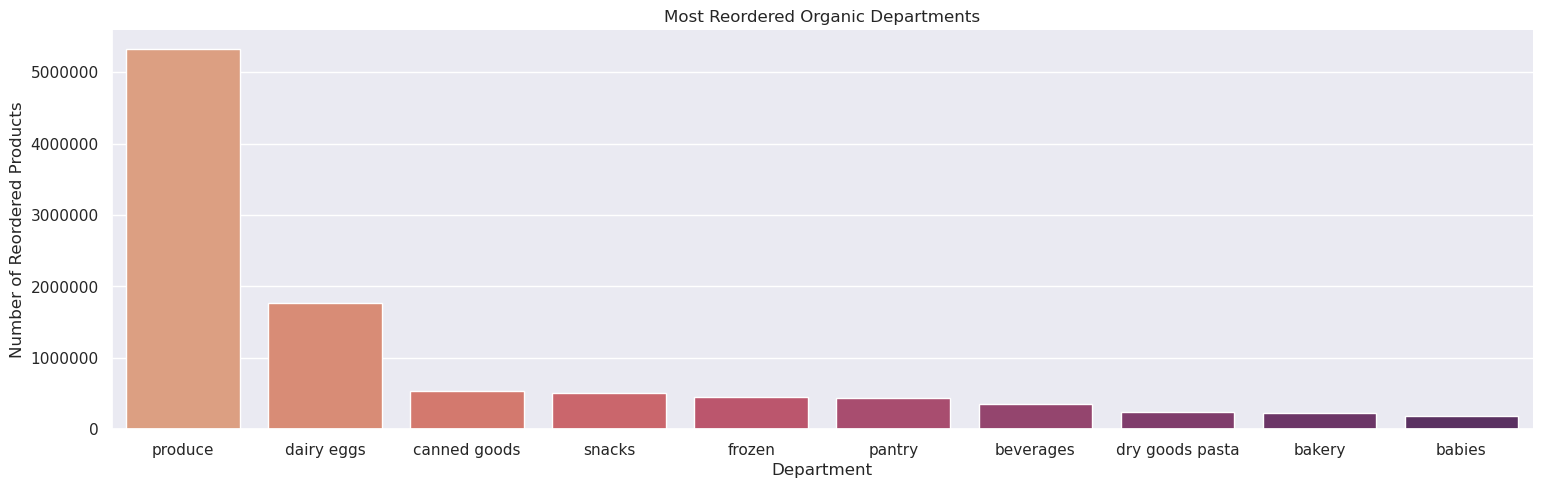

In [60]:
org = organic.groupby('department')['reordered'].count().sort_values(ascending=False).reset_index()
orgplot = org.head(10)

sns.catplot(orgplot, x='department', y='reordered', kind='bar', palette='flare', aspect=3);
plt.ticklabel_format(style='plain', axis='y');
plt.title('Most Reordered Organic Departments');
plt.xlabel('Department');
plt.ylabel('Number of Reordered Products');

__Answer O4:__  With our emphasis on future marketing application development, reordered products from Instacart become a crucial keypoint. The produce department has the most reordered organic products during the day and outnumbers all other departments in terms of reorders. It accounts for about 5,000,000 reordered products, although these do not represent individual items offered. As we delve further, we'll discover that despite having the highest amount of orders, the produce section has a severely limited variety of organic items. As a result, we propose increasing the quantity of produce department products with a wider organic selection, as users on Instacart may be seeking additional products that are currently not introduced or maintained in supply on a regular basis.

<hr>

<a id="section-v"></a>
## V. Conclusion

[Back to Top](#top)

From our initial exploration of this Instacart dataset, which comprises 365 days between 2016 and 2017, we have learned the following: Instacart is an online grocery shopping platform preferred by its users for short-term, convenience forward purchasing; there is a higher volume of reordered products than first-time purchases across the platform, indicating that customers return for the same range of products; and produce, especially organic produce, and dairy and eggs are the most frequently shopped departments, demonstrating Instacart's strength in the fresh food market.

We know, through a number of observations above, that Instacart customers shop in small orders (generally under 20 products) with an average frequency of 8-10 days between shops.  The combination of these two factors shows perhaps that customers use Instacart as a supplement to their regular grocery shopping, rather than for all of their grocery needs, but more information on customers would be needed to conclude this theory.  These observations give us a baseline set of customer behaviors to target for marketing.  For example, we could recommend advertising the convenience factor of Instacart with a notification strategy that contacts customers around the average days between shops.

Considering Instacart customers return to the platform to repurchase products they have bought before, it benefits Instacart to recommend products that customers have purchased before, or products similar to those they have purchased before.  This is common practice for online storefronts, and the logic extends to grocery marketing since shoppers notionally return for the same shortlist of products when they shop.  We saw in our kernel density estimation plots on reorder, that customers are most prone to purchasing new products (`reordered` = 0) at or after adding 20 products to their carts.  This would be an opportune time to recommend new products to a returning customer.

Finally, we learned that Instacart should continue to highlight its presence as a platform which delivers fresh food in a convenient way based on customers' preference toward the produce and dairy and eggs departments.  Additional market research would need to be done on the profitability of these departments compared to other grocery departments, but these were clear standouts on the Instacart platform.  If the Instacart customer base continues to view the platform as a means to find fresh food in a convenient manner, it will continue to have high volume in these departments.  It is also clear that organic products are of interest to Instacart customers, and there may be room to grow here.  This observation was the motivation for our last section, as there is clear interest in organic products among the Instacart customer base that should be explored further.

<hr>

<a id="section-vi"></a>
## VI. References

[Back to Top](#top)

Instacart. (2017). Instacart Market Basket Analysis. *Kaggle*. https://www.kaggle.com/competitions/instacart-market-basket-analysis/data

Stanley, J. (2017). The Instacart Online Grocery Shopping Dataset 2017 Data Descriptions. *GitHub* https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b

Stanley, J.(2017). 3 Million Instacart Orders, Open Sourced. *Instacart*. https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2

<hr>